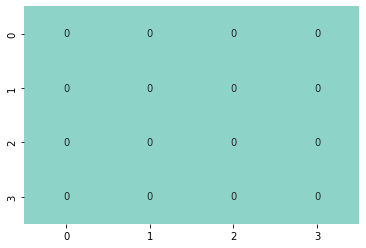

没有冲突


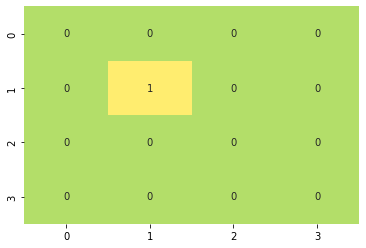

In [1]:
# N皇后
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams['figure.dpi']=50
plt.rcParams['font.size']=20

class Thing:
    def __init__(self, name=''):
        self.name = name
    def __repr__(self):
        return self.name

class Problem(Thing):
    def __init__(self, name):
        super().__init__(name)

class GameProblem(Problem):
    def __init__(self, name):
        super().__init__(name)
    def check_win(self):
        pass

class NQueen(GameProblem):
    def __init__(self, name, n):
        super().__init__(name)
        self.n = n
        self.map = np.zeros((n,n))
        # self.map = np.random.randint(0,10, (3,3))
    def check_45(self,state_map):
        if state_map is None:
            state_map = self.map
        n = self.n
        result_list = []
        for y in range(n-1):
            x = n-1
            l = 0
            while x>=0 and y<n:
                l += state_map[x,y]
                x-=1
                y+=1
            result_list.append(l)
        for x in range(1,n-1):
            y = 0
            l = 0
            while x>=0 and y<n:
                l += state_map[x,y]
                x-=1
                y+=1
            result_list.append(l)
        for y in range(n-1):
            x =0
            l = 0
            while y<n:
                l += state_map[x,y]
                x+=1
                y+=1
            result_list.append(l)
        for x in range(1,n-1):
            y =0
            l = 0
            while x<n:
                l += state_map[x,y]
                x+=1
                y+=1
            result_list.append(l)
        return result_list
    def check_win(self, state_map=None):
        if state_map is None:
            state_map = self.map
        check_map = np.concatenate([state_map.sum(axis=0),
                        state_map.sum(axis=1),
                        np.array(self.check_45(state_map))])
        # print(check_map)
        # print(np.where(check_map>1)[0])
        confict_num = len(np.where(check_map>1)[0])
        return confict_num ==0
    def pick(self, x,y):
        self.map[x,y]=1
        if self.check_win():
            print("没有冲突")
        else:
            print("有冲突")
        self.draw()
    def draw(self):
        sns.heatmap(self.map.clip(0,2),
                    cmap='Set3',
                    center = 0,
                    annot=True,
                    cbar = False
                    )
        plt.show()

game = NQueen('queen', 4)
game.draw()
game.pick(1,1)

[1. 2. 0. 3. 2. 2. 1. 1. 1. 0. 1. 2. 1. 2. 2. 0. 1. 0.]
[ 1  3  4  5 11 13 14]
有冲突


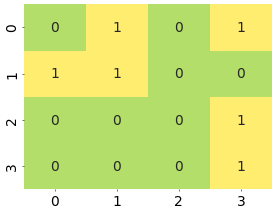

In [26]:
game.pick(0,1)

In [80]:
# 随机选点
class RandomPickNQueen(NQueen):
    def __init__(self, name, n):
        super().__init__(name, n)
    def auto_pick(self):
        n = self.n
        pick_time=0
        total_time= 30000
        while pick_time<total_time:
            pick_time += 1
            actions = np.concatenate([(np.where(self.map==0))], axis=1).T
            # print(actions)
            pick_list = actions[np.random.choice(np.arange(n*n), n, replace=False)]
            # print(pick_list)
            for x,y in pick_list:
                self.map[x,y] = 1
            if self.check_win():
                print("找到符合要求的四个点")
                self.draw()
                return True
            else:
                self.map -= self.map
                if pick_time % (total_time/10) ==0:
                    print("第{}次选点：{}".format(pick_time, pick_list.flatten()))
game = RandomPickNQueen('rand_queen', 8)
game.auto_pick()

第3000次选点：[6 6 0 4 4 1 3 6 2 0 7 6 0 6 5 1]
第6000次选点：[0 5 6 4 6 0 1 2 2 6 6 1 3 1 1 0]
第9000次选点：[1 7 6 0 6 3 4 2 3 7 3 6 4 0 3 5]
第12000次选点：[6 0 4 1 5 6 1 1 7 2 1 0 7 6 3 7]
第15000次选点：[0 5 6 6 1 3 7 5 5 6 3 4 2 1 0 2]
第18000次选点：[4 1 3 2 7 1 5 7 3 5 7 5 7 4 2 6]
第21000次选点：[7 6 4 1 2 2 6 2 5 5 3 1 6 1 0 2]
第24000次选点：[3 2 3 6 6 1 0 5 3 4 1 2 5 7 6 3]
第27000次选点：[2 0 0 5 2 5 4 5 7 4 4 4 2 3 3 2]
第30000次选点：[3 7 2 2 0 7 0 4 2 4 2 3 1 5 5 4]


第142次选点：[(2, 3), (0, 5), (5, 1), (4, 0), (1, 7), (6, 4), (3, 6), (7, 2)]
没有找到符合要求的点


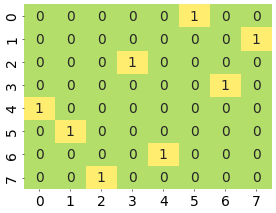

In [81]:
# 在之前节点基础上随机选
class RandomPickNQueen(NQueen):
    def __init__(self, name, n):
        super().__init__(name, n)
    def auto_pick(self):
        n = self.n
        pick_time=0
        total_time= 10000
        pick_list = []
        while pick_time<total_time and len(pick_list)<n:
            pick_time += 1
            actions = np.concatenate([(np.where(self.map==0))], axis=1).T
            # print(actions)
            x,y=actions[np.random.randint(0,len(actions))]
            # print(pick_list)
            self.map[x,y] = 1
            if self.check_win():
                pick_list.append((x,y))
            else:
                self.map[x,y] = 0
        print("第{}次选点：{}".format(pick_time, pick_list))
        if len(pick_list) == 4:
            print("找到符合要求的四个点")
        else:
            print("没有找到符合要求的点")
        self.draw()
game = RandomPickNQueen('rand_queen', 8)
game.auto_pick()

0 [6.0, 8.0, 5.0]
1000 [3.0, 4.0, 3.0]
2000 [3.0, 4.0, 3.0]
3000 [3.0, 3.0, 3.0]
4000 [3.0, 2.0, 3.0]
5000 [2.0, 1.0, 2.0]
6000 [1.0, 1.0, 2.0]
7000 [0.0, 1.0, 1.0]
[array([[4, 5],
       [0, 3],
       [3, 7],
       [1, 1],
       [6, 2],
       [5, 0],
       [7, 6],
       [2, 4]], dtype=int64), 0.0]


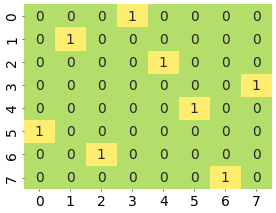

In [112]:
# 退火
class AnnealPickNQueen(NQueen):
    def __init__(self, name, n):
        super().__init__(name, n)
    def cal_conflict(self, state_map=None):
        if state_map is None:
            state_map = self.map
        check_map = np.concatenate([state_map.sum(axis=0),
                        state_map.sum(axis=1),
                        np.array(self.check_45(state_map))])
        # 记录总体有冲突的情况，效果一般
        # conflict_num = len(np.where(check_map>1)[0])
        # 直接求和，效果一般
        # conflict_num = check_map.sum()
        # 仅对有冲突的情况进行求和，效果最好
        conflict_num = (check_map[np.where(check_map>1)[0]]-1).sum()
        return conflict_num

    def auto_pick(self):
        n = self.n
        # 广撒网
        init_nodes = []
        init_nodes_num = 3
        actions = np.concatenate([(np.where(self.map==0))], axis=1).T
        for i in range(init_nodes_num):
            init_list = actions[np.random.choice(np.arange(n*n), n, replace=False)]
            for x,y in init_list:
                self.map[x,y] = 1
            init_nodes.append([init_list, self.cal_conflict()])
            self.map -= self.map
        # print(init_nodes)
        # 冷却
        t = 8
        pick_time=0
        while t!=0:
            # 选t个点，把它们随机换成另外的没有点的地方
            for [init_list, conflict_score_1], idx in zip(init_nodes, range(init_nodes_num+100)):
                np.random.shuffle(init_list)
                for x,y in init_list[:-t]:
                    self.map[x,y] = 1
                # 再计算新的状态的conflict分数，和原先状态比较，好的话进行替换
                actions = np.concatenate([(np.where(self.map==0))], axis=1).T
                rand_list_2 = actions[np.random.choice(np.arange(len(actions)), t, replace=False)]
                for x,y in rand_list_2:
                    self.map[x,y] = 1
                conflict_score_2 = self.cal_conflict()
                if conflict_score_2<conflict_score_1:
                    init_list[-t:] = rand_list_2
                    init_nodes[idx][1] = conflict_score_2
                self.map -= self.map
            if pick_time % 1000 ==0:
                print(pick_time, [x[1] for x in init_nodes])
                t-=1
            pick_time+=1
        init_nodes.sort(key=lambda x:x[1], reverse=False)
        print(init_nodes[0])
        for x,y in init_nodes[0][0]:
            self.map[x,y] = 1
        self.draw()

game = AnnealPickNQueen('rand_queen', 8)
game.auto_pick()

In [107]:
#[(6, 0), (5, 1), (4, 2), (3, 3), (2, 4), (1, 5), (0, 6)]
",".join([str(x) for x in game.check_45(game.map)])

'1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0'

In [99]:
import numpy as np
n =8
arr = np.arange(n*n).reshape(n,n)
arr = game.map.copy()
print(arr)
for y in range(n-1):
    x = n-1
    l = []
    while x>=0 and y<n:
        l.append((x,y))
        x-=1
        y+=1
    print(l)
for x in range(1,n-1):
    y = 0
    l = []
    while x>=0 and y<n:
        l.append((x,y))
        x-=1
        y+=1
    print(l)
for y in range(n-1):
    x =0
    l = []
    while y<n:
        l.append((x,y))
        x+=1
        y+=1
    print(l)
for x in range(1,n-1):
    y =0
    l = []
    while x<n:
        l.append((x,y))
        x+=1
        y+=1
    print(l)

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
[(7, 0), (6, 1), (5, 2), (4, 3), (3, 4), (2, 5), (1, 6), (0, 7)]
[(7, 1), (6, 2), (5, 3), (4, 4), (3, 5), (2, 6), (1, 7)]
[(7, 2), (6, 3), (5, 4), (4, 5), (3, 6), (2, 7)]
[(7, 3), (6, 4), (5, 5), (4, 6), (3, 7)]
[(7, 4), (6, 5), (5, 6), (4, 7)]
[(7, 5), (6, 6), (5, 7)]
[(7, 6), (6, 7)]
[(1, 0), (0, 1)]
[(2, 0), (1, 1), (0, 2)]
[(3, 0), (2, 1), (1, 2), (0, 3)]
[(4, 0), (3, 1), (2, 2), (1, 3), (0, 4)]
[(5, 0), (4, 1), (3, 2), (2, 3), (1, 4), (0, 5)]
[(6, 0), (5, 1), (4, 2), (3, 3), (2, 4), (1, 5), (0, 6)]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]
[(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7)]
[(0, 3), (1, 4), (2, 5), (3, 6), (4, 7)]
[(0, 4), (1, 5), (2, 6), (3, 7)]
[(0, 5), (1, 6), (2, 7)]
[(0,

(3,0)
(2,0)(3,1)
(1,0)(2,1)(3,2)
(00)(11)(22)(33)
(0,1)(1,2)(2,3)
(0,2)(1,3)
(0,3)
(3,3)
(3,2)(2,3)
(3,1)(2,2)(1,3)
(3,0)(2,1)(1,2)(0,3)
(2,0)(1,1)(0,2)
(1,0)(0,1)
(0,0)